In [21]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display
import csv
from scipy.signal import butter, lfilter

In [71]:
data = []
with open("data/audio_data_11.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric
    

In [72]:
data

[7.10361,
 7.92975,
 3.83986,
 2.36733,
 5.68537,
 4.30535,
 4.09558,
 2.24207,
 1.27309,
 2.02073,
 1.38067,
 0.71612,
 1.49225,
 2.87495,
 2.54898,
 2.39144,
 3.88134,
 4.81795,
 2.70561,
 3.13183,
 2.16888,
 1.1728,
 2.99623,
 2.39254,
 0.53618,
 0.42306,
 4.78737,
 4.53961,
 1.31914,
 0.66289,
 3.37565,
 2.42795,
 5.37105,
 4.0064,
 1.0163,
 1.25674,
 0.06165,
 1.93765,
 1.20779,
 2.66035,
 0.78103,
 0.44146,
 3.56755,
 5.5895,
 2.53222,
 5.34187,
 5.54474,
 5.986,
 2.57483,
 4.05445,
 5.26105,
 6.76103,
 4.83882,
 3.94932,
 1.64007,
 2.45298,
 2.55252,
 0.95303,
 2.3151,
 3.62323,
 2.48895,
 5.79809,
 4.09011,
 5.04487,
 6.57978,
 4.78528,
 2.87894,
 3.57394,
 6.84095,
 4.01761,
 2.06851,
 3.89974,
 5.2013,
 5.89924,
 5.76602,
 3.52151,
 2.0588,
 3.37692,
 3.72995,
 5.25714,
 3.51044,
 4.14412,
 3.29372,
 1.95317,
 3.60282,
 4.70661,
 3.91666,
 6.84649,
 4.83789,
 2.82069,
 1.70143,
 4.52649,
 5.42105,
 5.90612,
 4.57932,
 6.17388,
 6.39654,
 4.85655,
 5.82675,
 4.64978,
 3.89826,

In [73]:
len(data)

7847

In [74]:
data = np.array(data, dtype=np.float32)

In [75]:
display.Audio(data, rate=8e3)

In [76]:
resampled = librosa.resample(data, orig_sr=40e3, target_sr=16e3)

In [78]:
display.Audio(resampled[int(3e3):int(19e3)], rate=16e3)

In [80]:
selected = resampled[int(6e3):int(22e3)]

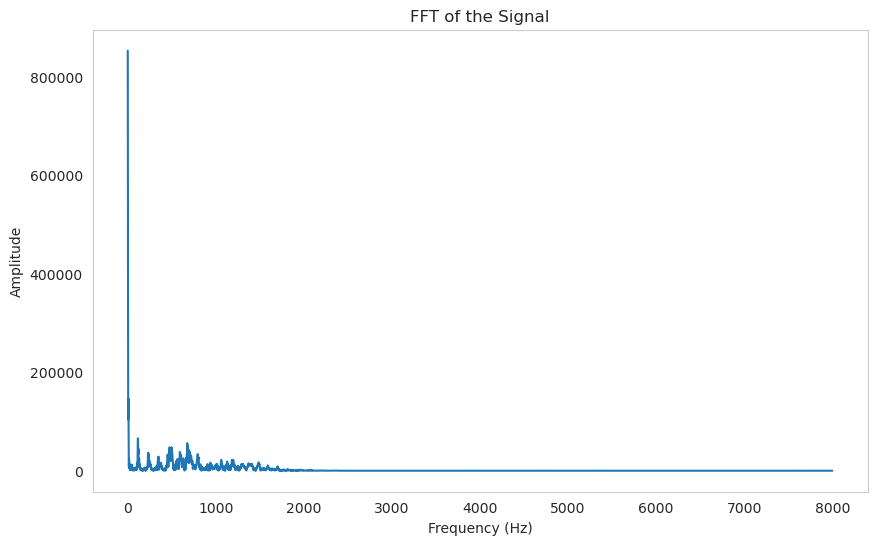

In [49]:
fft_result = np.fft.fft(abs(data))
fft_freqs = np.fft.fftfreq(len(data), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [35]:
selected /= np.max(selected)

NameError: name 'selected' is not defined

# Filter raw data with bufferworth filter

In [12]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, data)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [13]:
contains_none = any(item is None for item in y)

print(contains_none)

False


# Highpass filter

In [14]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

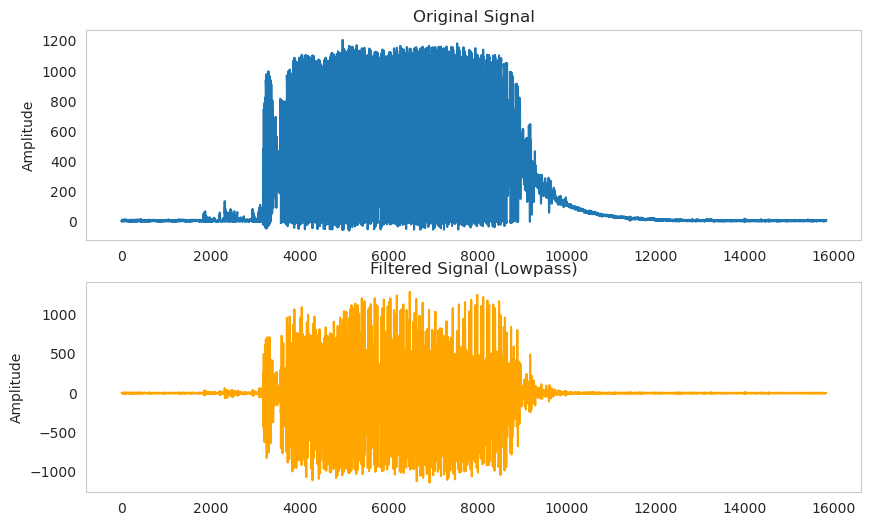

In [16]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [17]:
display.Audio(y_highpass, rate=16e3)

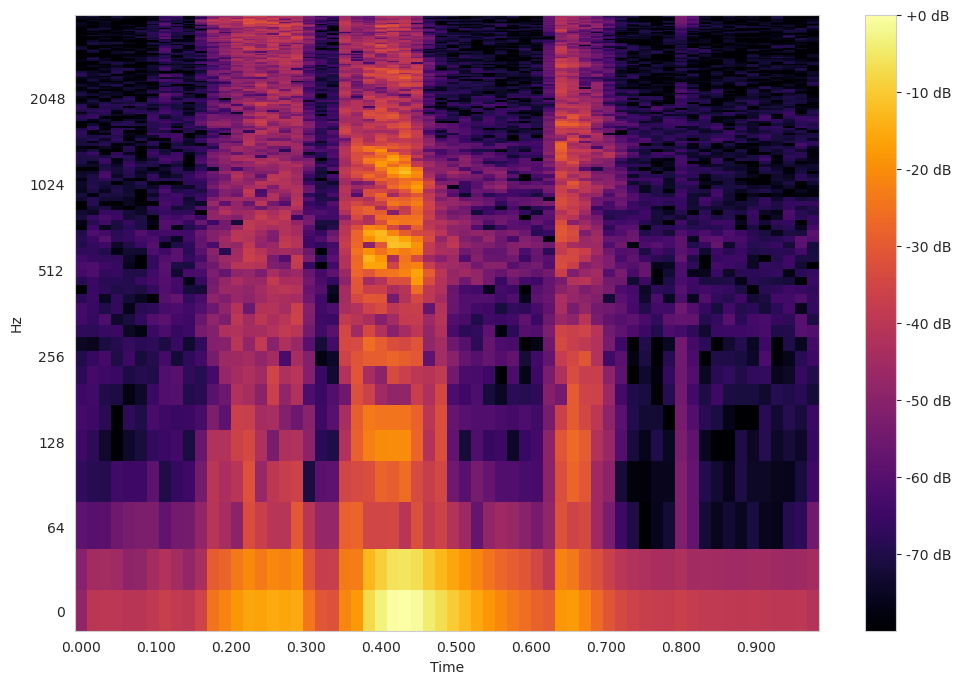

In [77]:
D = librosa.stft(data, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

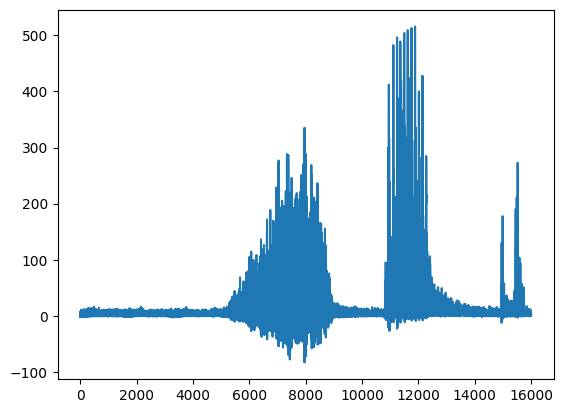

In [61]:
plt.plot(selected)